### Google Apps Store Data Analysis

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import ydata_profiling as yd

In [190]:
# import data
df = pd.read_csv('./data/googleplaystore.csv')

> __App Column:-__
 This column shows the name of the app 
 
> __Category:-__ 
 This column shows the category of app it belongs to
 
> __Rating:-__ 
 This column shows the app rating by users
 
> __Reviews:-__ 
 This column shows user reviews about the 
 
> __Size:-__ 
 This column shows the size of the app 
 
> __Install:-__
 This column shows the app installations by users 
 
> __Type:-__
 This column shows that if the app is free or paid 
 
> __Price:-__
 This column shows the price of the app
 
> __Content Rating:-__ 
 This column shows that who is this app for based on content rating 
 
> __Genre:-__
 This column shows the type or genre of the app 
 
> __Last update:-__
 This column shows when the app was last updated 
 
> __Current Version:-__
 This column shows the current version of the app
 
> __Android version:-__
 This column show that which android version it will work on.



In [157]:
# to run ydata_profiling for auto data analysis
# profile = yd.ProfileReport(df)
# profile.to_file(output_file='./output/04_ydata_GooglePlayStore.html')

In [158]:
# check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [159]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [160]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9870,EU Economy,PRODUCTIVITY,3.6,47,879k,"5,000+",Free,0,Everyone,Productivity,19-Dec-17,9,4.2 and up
2973,Sport.pl LIVE,SPORTS,4.4,21733,Varies with device,"1,000,000+",Free,0,Mature 17+,Sports,29-Jun-18,Varies with device,Varies with device


The cells need to be changed by type to numeric
1. Size
2. Price
3. Installs

In [191]:
# Checking values in 'Size' column
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [192]:
# defining a function to convert size column values to MBs and removing the last character of english
def conv_value(v):
    v = v.lower().replace(',','')
    if 'm' in v:
        return float(v.replace('m',''))  # All values contain capital 'M' 
    elif 'k' in v:
        return float(v.replace('k','')) / 1024 # All values contain small 'k' and convert KBs in MBs
    elif 'Varies with device' in v:
        return v.replace('Varies with device', 'NaN')

In [193]:
# Applying the function to 'Size' Column
df['Size']= df["Size"].apply(conv_value)

# Lets check the values of 'Size' Column after applying this function
df['Size'].value_counts()

Size
11.000000    198
12.000000    196
14.000000    194
13.000000    191
15.000000    184
            ... 
0.419922       1
0.418945       1
0.195312       1
0.449219       1
0.604492       1
Name: count, Length: 459, dtype: int64

In [195]:
# Checking missing values in 'Size' Column
df['Size'].isna().sum()

np.int64(1695)

In [196]:
# checking values in 'Price' column
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [198]:
# defince a function to remove '$' sign from the values
def rem_dollar_sign(v):
    if '$' in v:
       return float(v.replace('$',''))
    # lets apply the function to the column
df['Price'] = df['Price'].apply(rem_dollar_sign)    

TypeError: argument of type 'float' is not iterable

In [199]:
df[df['Price'].isna()] # this columns contain 'NaN' values for 'Free' apps

# lets fill 'NaN' values with '0'
df['Price'].fillna(0, inplace = True )
df['Price'].dtype

dtype('float64')

In [200]:
# Lets check the data again for numeric statistics
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084100e+04,9146.000000,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.027273
std,0.515735,2.927629e+06,22.588679,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.476800e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [202]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [203]:
# lets define a function to remove '+' sign from values in 'Installs' column
def rem_add(v):
    if ',' in v or '+' in v:
        v = v.replace(',', '')
        v = v.replace("+",'')
        return int(v)
# apply the function to 'Install' columns' all values        
df['Installs'] = df["Installs"].apply(rem_add)  


In [208]:
df[df['Installs']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0.0,Paid,1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0.0,Paid,13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4,0.0,Paid,1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0.0,Paid,2.99,Everyone,Education,15-Apr-16,1,3.0 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0.0,Paid,154.99,Everyone,Productivity,24-Nov-17,1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9,0.0,Free,0.00,Teen,Social,21-Jul-18,0.0.1,4.4 and up
8081,CX Network,BUSINESS,NaN,0,10.0,0.0,Free,0.00,Everyone,Business,6-Aug-18,1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1,0.0,Free,0.00,Everyone,News & Magazines,7-Jul-18,1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2,0.0,Free,0.00,Everyone,Art & Design,14-Mar-17,4,4.2 and up
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56.0,0.0,Paid,3.99,Everyone,Travel & Local,22-Jan-17,1.1.1,4.1 and up


In [169]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5797,Axe Knight,GAME,4.5,52,33.0,5000.0,Free,0.00,Everyone,Action,26-Jun-18,1.0.5,4.1 and up
2348,Moodpath - Depression & Anxiety Test,MEDICAL,4.6,6035,8.9,100000.0,Free,0.00,Everyone,Medical,5-Jul-18,1.2.0,4.4 and up
8376,The DG Buddy,BUSINESS,3.7,3,11.0,10.0,Paid,2.49,Everyone,Business,30-Jun-14,v3,2.2 and up
1354,"Eve Period Tracker - Love, Sex & Relationships...",HEALTH_AND_FITNESS,4.6,20326,28.0,1000000.0,Free,0.00,Teen,Health & Fitness,4-Aug-18,2.9.18,4.1 and up
2910,VSCO,PHOTOGRAPHY,4.4,753115,NaN,50000000.0,Free,0.00,Everyone,Photography,3-Aug-18,71,4.4 and up


In [170]:
# Verifying if in column 'Type' value is free then the value in column 'Price' should not be greater than 0
df[(df['Type']=='Free') & (df['Price']>0)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [215]:
df['Price'].value_counts().head(10)

Price
0.00    10041
0.99      148
2.99      129
1.99       73
4.99       72
3.99       63
1.49       46
5.99       30
2.49       26
9.99       21
Name: count, dtype: int64

In [209]:
# Binning the "Installs" column values
bins = [0,1000, 10000, 100000, 500000, 1000000, 10000000]
labels = ['less than 1K','1K+', '10K+','100K+','1M+','10M+']
df['binned_installs'] =pd.cut(df['Installs'], bins =  bins, labels = labels)
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,binned_installs
10333,Santa Fe Map and Walks,TRAVEL_AND_LOCAL,NaN,2,47.0,1000.0,Free,0.0,Everyone,Travel & Local,20-Apr-18,32,4.0 and up,less than 1K
5549,Monster Park AR - Jurassic Dinosaurs in Real W...,FAMILY,3.7,128,20.0,10000.0,Free,0.0,Everyone,Entertainment,8-Mar-18,1.2.2.122,7.0 and up,1K+
6964,LEDSHOWTW,TOOLS,4.2,5,31.0,500.0,Free,0.0,Everyone,Tools,23-Apr-18,1.3.3,4.0.3 and up,less than 1K


<Axes: xlabel='binned_installs', ylabel='Count'>

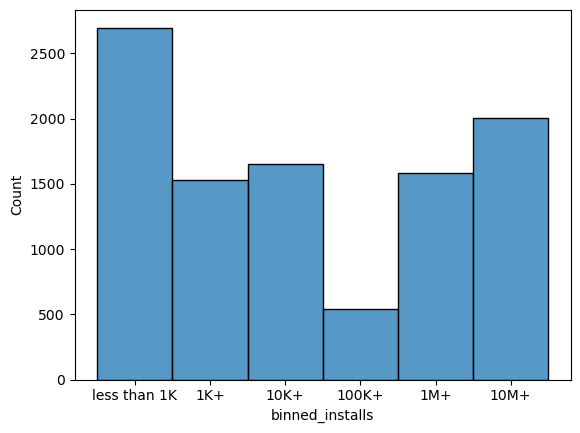

In [211]:
sns.histplot((df['binned_installs']))

In [ ]:
# These pandas code lines can also be used for removing string values
df['Price'] =df['Price'].str.replace('$', '') 
df = df.replace("Varies with device", None) 
df['Installs'] = df['Installs'].replace('+', '', regex=True)